# Block 1

In [ ]:
# importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Block 2

In [ ]:
# my function
def predictfunc(X, y, drawfig):
  """
  a function that will take in a dataset, use decision tree binary classification to split the data, and plot the data + ROC curve
  input: dataset
  output: tree model scores, subplots to visualize the data w/ ROC curve
  """
  Xdf = pd.DataFrame(X)
  ydf = pd.DataFrame(y)
  Xtrain, Xtest, ytrain, ytest = train_test_split(Xdf, ydf, random_state = 1)
  tree_model = tree.DecisionTreeClassifier(max_depth = 2)
  tree_model.fit(Xtrain, ytrain)
  tree_model.tree_.max_depth
  if drawfig == 1:
    fig, axes = plt.subplots(2, 1, figsize = [5, 5], clear = True)
    sns.boxplot(y, X, ax = axes[0])
    axes[0] = plt.xlabel('surived')
    axes[0] = plt.ylabel('fare')
    fpr_tree,tpr_tree,thresholds_tree = metrics.roc_curve(ytest,tree_model.predict_proba(Xtest)[:,1])
    axes[1] = plt.plot(fpr_tree,tpr_tree,label='ROC curve')
    axes[1] = plt.plot([0,1],[0,1],color=[0,0,0],linestyle=':')
    axes[1] = plt.xlabel('false positive rate')
    axes[1] = plt.ylabel('true positive rate') 
    fig.tight_layout()
  return tree_model.score(Xtrain, ytrain), tree_model.score(Xtest, ytest)

# Block 3

In [ ]:
data = sns.load_dataset('titanic')

# Block 4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.688622754491018, 0.6278026905829597)

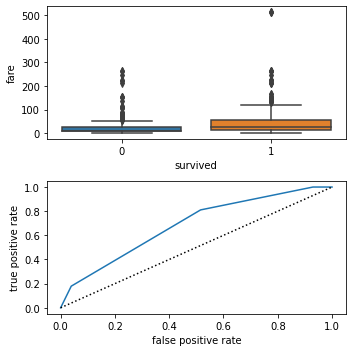

In [ ]:
predictfunc(data['fare'], data['survived'], 1)

# Block 5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.6826347305389222, 0.6681614349775785)

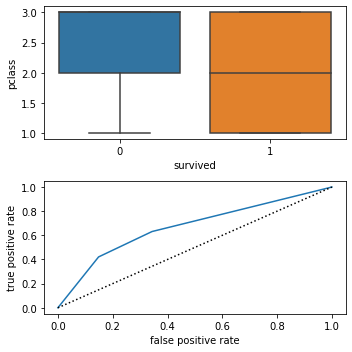

In [ ]:
predictfunc(data['pclass'], data['survived'], 1)

# Findings
Visualizing the Titanic dataset with both a boxplot and ROC curve shows that Pat should focus on being in a better class in order to survive the Titanic. The boxplots show that of the individuals who survived the Titanic, those who were in a higher class were more likely to survive. In addition, the ROC curve for this plot leans more toward the upper left, which indicates a higher degree of accuracy.